In [ ]:
# Diamonds Data Set containig the prices and other features of close to 54000 diamonds
# Description of the data set
# price price in US dollars (\$326--\$18,823)
# carat weight of the diamond (0.2--5.01)
# cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
# color diamond colour, from J (worst) to D (best)
# clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
# x length in mm (0--10.74)
# y width in mm (0--58.9)
# z depth in mm (0--31.8)
# depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
# table width of top of diamond relative to widest point (43--95)




# The aim of this process is to build a linear regression model in order to predict the prices of diamonds based on certain features.

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as sm
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor    
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold

# Importing diamond dataset into pandas dataframe

In [122]:
diamonds=pd.read_csv('diamonds.csv')

In [236]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31
3,0.29,1,1,3,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,2,0,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds.describe()
# The minimum values of x,y and z are zero and need to be removed as they account for inconsistent data. Since, there cannot 
# be a price for a diamond which doesn't have either of the 3 dimensions in real world scenario.

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [124]:
diamonds = diamonds.drop(diamonds[(diamonds.x == 0) & (diamonds.y == 0)].index)
diamonds=diamonds.drop(diamonds[diamonds.z == 0].index)
#Dropping all the rows which account for zero value in 'x','y' and 'z' columns

In [125]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [127]:
# encode cut, color and clarity
categorical_cols = ['cut', 'color', 'clarity']
for c in categorical_cols:
    diamonds[c] = pd.factorize(diamonds[c])[0]
diamonds.head(3)
#Since the values of 'cut,'color' and 'clarity' are String values, they are being converted to numerical values to check how
# co-related they are to the price of the diamond.

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,0,0,0,61.5,55.0,326,3.95,3.98,2.43
1,0.21,1,0,1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,0,2,56.9,65.0,327,4.05,4.07,2.31


In [128]:
diamonds.corr()
# Looking at the below chart, we can infer that there are 4 values which are highly co-related to the price of a diamond  amongst
# any other value. We explore 'x','y','z','carat' to see whether they have a linear relationship with the price for them to be 
# chosen as independent variables for linear regression.
# Note: 'x,'y' and 'z' are very nearly co-related so we will have to infer whether all three variables are required are not using
# VIF which has been explained below.

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.114524,-0.065554,-0.281287,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
cut,0.114524,1.000000,-0.029148,-0.118717,0.169970,0.381969,0.049507,0.105866,0.105889,0.127440
color,-0.065554,-0.029148,1.000000,0.032568,-0.001636,-0.034140,-0.016675,-0.055067,-0.054587,-0.055153
clarity,-0.281287,-0.118717,0.032568,1.000000,-0.025823,-0.133710,-0.140249,-0.306878,-0.297735,-0.301792
depth,0.028259,0.169970,-0.001636,-0.025823,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,0.381969,-0.034140,-0.133710,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,0.049507,-0.016675,-0.140249,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,0.105866,-0.055067,-0.306878,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,0.105889,-0.054587,-0.297735,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.127440,-0.055153,-0.301792,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


In [228]:
#Plotting a scatter plot to observe whether the relationship between price and length of diamonds in mm is linear or not. The
# relationship looks linear as with an increase in the size of the diamond, the price also increases.

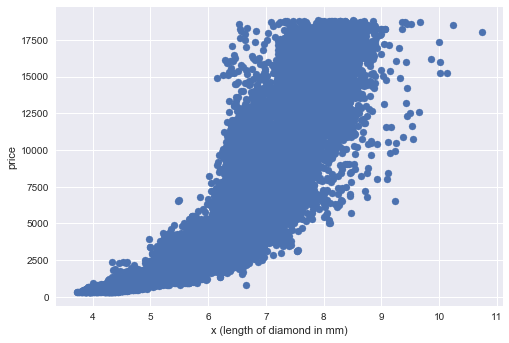

In [16]:
plt.scatter(X,y)
plt.ylabel('price')
plt.xlabel('x (length of diamond in mm)')
plt.show()

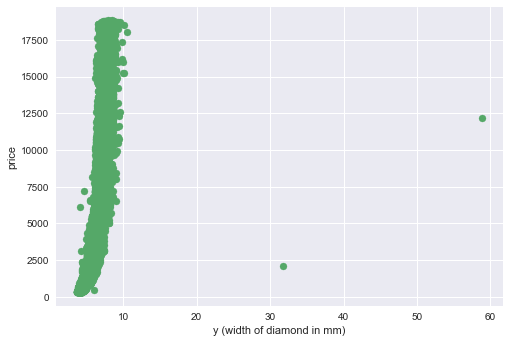

In [130]:
X=diamonds['y']
y=diamonds['price']
plt.scatter(X,y)
plt.ylabel('price')
plt.xlabel('y (width of diamond in mm)')
plt.show()
# The relationship isn't nearly linear as x but that is mainly because 'y' does not have a much wide spread range of values 
# as 'x'.

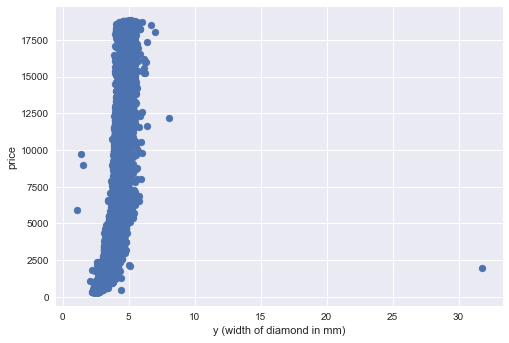

In [131]:
X=diamonds['z']
y=diamonds['price']
plt.scatter(X,y)
plt.ylabel('price')
plt.xlabel('y (width of diamond in mm)')
plt.show()
# Similar for the column 'z', the relationship is linear but the spread of values is limited around a particular range due 
# to which the area under the curve is not that much.


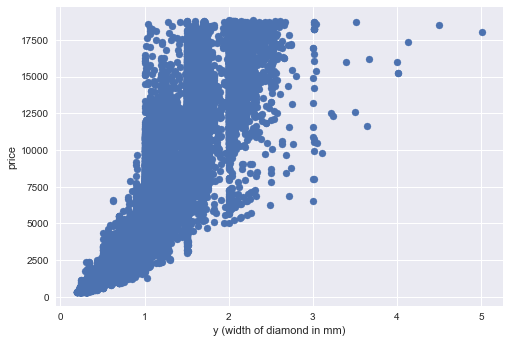

In [132]:
X=diamonds['carat']
y=diamonds['price']
plt.scatter(X,y)
plt.ylabel('price')
plt.xlabel('y (width of diamond in mm)')
plt.show()
# 'carat' also definitely looks like a prime candidate for being included in the regression as it has a much dense relationship
# with the price of the diamond.

In [ ]:
# regression is of the type y=ax + b where y is the target feature, x is the single feature, a and b are parameters of the model
# which we want to fit. Question gets reduced to how do we choose a and b.

# Looking at the above table, columns 'x','y','z','carat' are positively co-related to the 'price' of the diamond.

In [202]:
X = diamonds[["x","y","z","carat"]]
y = diamonds[["price"]]

In [203]:
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [204]:
# Fit the linear model
model = linear_model.LinearRegression()
results = model.fit(X, y)
print(results)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


In [207]:
# Print the coefficients
print (results.intercept_, results.coef_)

[ 2425.35155013] [[  -916.49692763    194.75946718   -781.13447738  10539.05876416]]


In [208]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()
# Here the Ordinalry Least Squares method has given us the r^2 value of 0.926 which is decent enough for our model to be 
# predicted on these variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                 1.678e+05
Date:                Wed, 08 Nov 2017   Prob (F-statistic):               0.00
Time:                        14:44:18   Log-Likelihood:            -4.7179e+05
No. Observations:               53920   AIC:                         9.436e+05
Df Residuals:                   53916   BIC:                         9.436e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x           -398.1844     35.025    -11.369      0.000    -466.834    -329.535
y            198.2386     26.093      7.597      0.000     147.096     249.381
z           -629.8323     42.763    -14.728      0.000    -713.648    -546.016
carat       9148.2149     20.706    441.812      0.000    9107.631    9188.799
==============================================================================
Omnibus:                    14501.339   Durbin-Watson:                   1.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           248472.008
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                      13.379   Cond. No.                         70.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [209]:
#Predicting without splitting the dataset into test and train.
ypred=results.predict()
print(ypred)

[ -210.24164609  -321.48841584  -156.63873761 ...,  3033.81922508
  4276.27843728  3410.81737891]


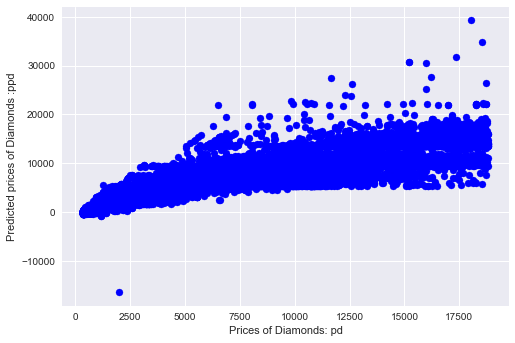

In [210]:
plt.scatter(y, ypred , color='blue')
plt.xlabel("Prices of Diamonds: pd")
plt.ylabel("Predicted prices of Diamonds :ppd")
plt.show()
# As we can see in this graph, the highest price of the diamond in the dataset is > 17500 and the predicted price is largely 
# scattered over the 10000-20000 range with a few outliers on the >20000. 

In [211]:
#Calculating the root mean squared error of the fit regression line based on independent variables 'x','y','z','carat'
rmseFull = np.sqrt(metrics.mean_squared_error(y, ypred))
print(rmseFull)

1526.7246179


In [212]:
y_m=np.mean(y)
print(rmseFull/y_m)
# The mean squared error is divided with the mean to calculate the coefficient of variation between the actual and the residual
# values. It is just a root mean squared value which helps us to normalize the rsme around the mean. 


price    0.388381
dtype: float64


In [206]:
results.score(X,y)
#The score of the model is the explained variance of the predictions.

0.85467980469069782

# Checking for VIF for eliminating multicollinearity and overfitting

In [213]:
#Implementing VIF (Variance Inflation Factor) to check whether the selected independent variables are correct for prediction 
# or not. Also, 'x', 'y' and 'z' had very close levels of co-relation with price which makes us to investigate whether all 
# three are important or not.
indep=['x','y','z','carat']
X=diamonds[indep]

In [214]:
thresh=10 #Setting a threshold of 10 as a sign of serious and sever multi-collinearity
for i in np.arange(0,len(indep)):
    vif=[variance_inflation_factor(X[indep].values,ix)
    for ix in range(X[indep].shape[1])]
    maxloc=vif.index(max(vif))
    if max(vif) > thresh:
        print ("vif :", vif)
        print( X[indep].columns[maxloc] )
        del indep[maxloc]
    else:
        break
        
    print ('Final variables: ', indep)

vif : [967.7685662415148, 538.43498364820869, 550.97276070002886, 8.5368247422712979]
x
Final variables:  ['y', 'z', 'carat']
vif : [305.48530956218264, 308.36909755631012, 8.4559776382625174]
z
Final variables:  ['y', 'carat']


In [186]:
X[indep].head(5)
# After performing VIF on the chosen variables, we see that the VIF for 'x' and 'z' surpass the threshold of 10 and leaves us 
# only 'carat' and 'y'. This selection is somewhat in sync with the OLS table where a unit increase in 'carat' and 'y' (width)
# of the diamond results in the increase in price of the diamond. Whereas, 'x' and 'z' result in the decrease in the price of the
# diamond.

,y,carat
0,3.98,0.23
1,3.84,0.21
2,4.07,0.23
3,4.23,0.29
4,4.35,0.31


# Fitting a model based on multiple parameter ('y','carat')

In [231]:
X=diamonds[["y","carat"]]
y=diamonds[["price"]]

In [235]:
model = sm.OLS(y, X)
results = model.fit()
# Statsmodels gives R-like statistical output
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                 3.289e+05
Date:                Wed, 08 Nov 2017   Prob (F-statistic):               0.00
Time:                        15:43:08   Log-Likelihood:            -4.7229e+05
No. Observations:               53920   AIC:                         9.446e+05
Df Residuals:                   53918   BIC:                         9.446e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y           -573.9402      3.281   -174.912      0.000    -580.372    -567.509
carat       9059.1487     20.679    438.077      0.000    9018.617    9099.680
==============================================================================
Omnibus:                    16356.664   Durbin-Watson:                   1.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           329860.554
Skew:                           0.964   Prob(JB):                         0.00
Kurtosis:                      14.963   Cond. No.                         18.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [234]:
model = linear_model.LinearRegression()
results = model.fit(X_train, y_train)
pred_train=results.predict(X_train)
pred_test=results.predict(X_test)
print(results.score(X_test,y_test))
print(results.score(X_train,y_train))

0.855848511224
0.848616532311


In [227]:
# Print the coefficients
print (results.intercept_, results.coef_)

[-674.4209438] [[ -403.74305383  8681.52720734]]


In [229]:
#Predicting training set for price column 

print(pred_train)

[[  506.89553115]
 [  202.01694801]
 [  260.57020631]
 ..., 
 [  876.3730029 ]
 [ 4704.38292821]
 [ 7088.81164157]]


In [230]:
#Predicting testing set for price column
print(pred_test)

[[  244.42048416]
 [ 7690.47291578]
 [ 9586.28841001]
 ..., 
 [ 3914.97061847]
 [  264.60763685]
 [ 3777.67694917]]


In [219]:
rmsetrain = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
print(rmsetrain)
rmsetest = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
print(rmsetest)
#Even the rmse's do not vary much.

1557.66032481
1499.35226989


In [165]:
y_m=np.mean(y)
print(y_m)
print(rmsetrain/y_m)
print(rmsetest/y_m)

price    3930.993231
dtype: float64
price    0.396251
dtype: float64
price    0.381418
dtype: float64


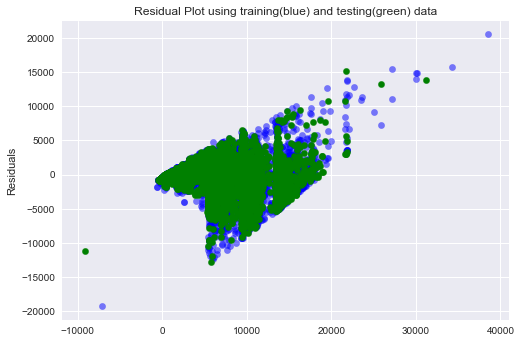

In [220]:
plt.scatter(pred_train, pred_train - y_train, c='b', s=40, alpha=0.5)
plt.scatter(pred_test, pred_test - y_test, c='g', s=40)
plt.title('Residual Plot using training(blue) and testing(green) data')
plt.ylabel('Residuals')
plt.show()
#This plot shows that the predicted values lie in the same vicinity as the tested values which is very much in 
#sync according to the independent variables that are used for prediction.
# here, we can also see that the predicted values are very close the real values which means that to predict the price of the 
# diamond, width and carat parameters are enough.

# Now let us test whether the model fit is appropriate or not

# Cross Validationg using Scikit Learn

In [ ]:
#R^2 value is basically dependant on the way the data is split. Hence, there may be times when the R^2 value may not be able to
# represent the model's ability to generalize. For this we perform cross validation.

In [225]:
reg=linear_model.LinearRegression()
cv_results=cross_val_score(reg,X,y,cv=5)
print(cv_results)
print(np.mean(cv_results))
print(np.std(cv_results))
#Using cross validation of score 5

[-0.72614722  0.38899251  0.71109183 -5.47050531 -1.20019253]
-1.25935214625
2.21906772735


# Regularization

In [ ]:
#We perform regularization in order to alter the loss function to penalize it for having higher coefficients for each feature
# variable. And as we know, large coefficients leads to overfitting.

# Ridge Regression

In [102]:
ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)
#The score is pretty much similar to the linear model built which ensures that the model has passed the Ridge regression test
# for regularization
#Ridge is used to penalize the loss function by adding the OLS loss function to the square of each coefficient multiplied by alpha.

0.83926182319378495

# Lasso Regression

In [103]:
lasso=Lasso(alpha=.1)
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

[ -437.73767756  8760.21546298]


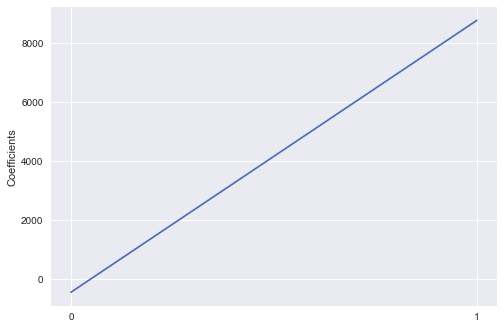

In [104]:
_ =plt.plot(range(len(X.T)),lasso_coef)
_ =plt.xticks(range(len(X.T)), X.T)
_ =plt.ylabel('Coefficients')
plt.show()
#As we can see from the lasso regression, it is very evident that "carat" which is at the 2nd position of the X plays a huge factor
# in the increase of the price of the diamond along with the breadth ("y") which is at position 0 of X. 